<a href="https://colab.research.google.com/github/kunwarsharik/SharikProjects/blob/master/SHAP_Explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image
#Image(filename='shap-thumb.png', width='70%' )

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
!pip install catboost
!pip install ipywidgets

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
import catboost
print('catboost version:', catboost.__version__)
from catboost import CatBoostClassifier 


catboost version: 0.26.1


In [ ]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2021-08-23 14:34:12--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2021-08-23 14:34:12 (5.31 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [ ]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].replace(np.NaN, 'U') 
titanic_df['Cabin'] = [ln[0] for ln in titanic_df['Cabin'].values]
titanic_df['Cabin'] = titanic_df['Cabin'].replace('U', 'Unknown')
titanic_df['isfemale'] = np.where(titanic_df['Sex'] == 'female', 1, 0)

In [ ]:
# drop features not needed for model 
titanic_df = titanic_df[[f for f in list(titanic_df) if f not in ['Sex', 'Name', 'Boat','Body', 'Ticket', 'home.dest']]]
# make pclass actual categorical column
titanic_df['Pclass'] = np.where(titanic_df['Pclass'] == 1, 'First', np.where(titanic_df['Pclass'] == 2, 'Second', 'Third'))
titanic_df['Embarked'] = titanic_df['Embarked'].replace(np.NaN, 'Unknown') 
# impute age to mean
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Age']
titanic_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,isfemale
0,1,0,Third,22.0,1,0,7.2500,Unknown,S,0
1,2,1,First,38.0,1,0,71.2833,C,C,1
2,3,1,Third,26.0,0,0,7.9250,Unknown,S,1
3,4,1,First,35.0,1,0,53.1000,C,S,1
4,5,0,Third,35.0,0,0,8.0500,Unknown,S,0


In [ ]:
titanic_catboost_ready_df = titanic_df.dropna() 
features = [feat for feat in list(titanic_catboost_ready_df) if feat != 'Survived']
print(features)
categorical_features = np.where(titanic_catboost_ready_df[features].dtypes != np.float)[0]
X_train, X_test, y_train, y_test = train_test_split(titanic_df[features], titanic_df[['Survived']], test_size=0.3, random_state=1)
 
params = {'iterations':5000,'learning_rate':0.01,'cat_features':categorical_features,'depth':3,'eval_metric':'AUC','verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 1}
cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,eval_set=(X_test, y_test),use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True);

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'isfemale']


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7864450	best: 0.7864450 (0)	total: 50.4ms	remaining: 4m 12s
200:	test: 0.8247513	best: 0.8261154 (190)	total: 371ms	remaining: 8.85s
400:	test: 0.8259733	best: 0.8261438 (392)	total: 683ms	remaining: 7.84s
600:	test: 0.8277067	best: 0.8279341 (551)	total: 1.05s	remaining: 7.67s
800:	test: 0.8281046	best: 0.8286161 (655)	total: 1.39s	remaining: 7.3s
1000:	test: 0.8285877	best: 0.8290423 (884)	total: 1.72s	remaining: 6.89s
1200:	test: 0.8269395	best: 0.8290423 (884)	total: 2.23s	remaining: 7.04s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8290423416
bestIteration = 884

Shrink model to first 885 iterations.


In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 5.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491654 sha256=52403d7b6ba0879c1d8b104e3e2575c6f1a8066128536cd69358eeb4c0c0fba1
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap  # package used to calculate Shap values
from catboost import CatBoostClassifier, Pool
shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features) ,type="ShapValues")
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

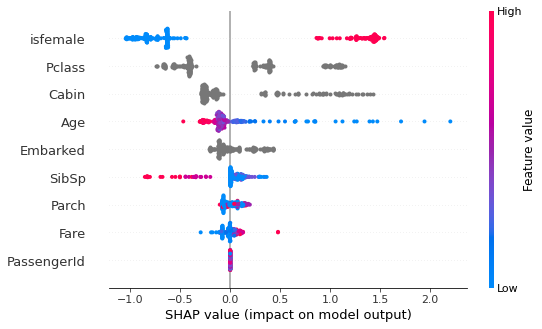

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())

for ln in boston_dataset.DESCR.split('\n'):
    print(ln)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [ ]:
# Our target variable - Median value of owner-occupied homes in $1000s
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from catboost import CatBoostRegressor

# data split
outome_name = 'MEDV'
features_for_model = [f for f in list(boston) if f not in [outome_name, 'TAX']]

# get categories and cast to string
boston_categories = np.where([boston[f].apply(float.is_integer).all() for f in features_for_model])[0]
print('boston_categories:', boston_categories)

# convert to values to string
for feature in [list(boston[features_for_model])[f] for f in list(boston_categories)]:
    print(feature)
    boston[feature] = boston[feature].to_string()


# data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston[features_for_model], 
                                                 boston[outome_name], 
                                                 test_size=0.3, 
                                                 random_state=1)




params = {'iterations':5000,
        'learning_rate':0.001,
        'depth':3,
        'loss_function':'RMSE',
        'eval_metric':'RMSE',
        'random_seed':55,
        'cat_features':boston_categories,
        'metric_period':200,  
        'od_type':"Iter",  
        'od_wait':20,  
        'verbose':True,
        'use_best_model':True}


model_regressor = CatBoostRegressor(**params)

model_regressor.fit(X_train, y_train, 
          eval_set=(X_test, y_test),  
          use_best_model=True,  
          plot= True   
         );

boston_categories: [3 8]
CHAS
RAD


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 9.0053157	test: 9.5900524	best: 9.5900524 (0)	total: 1.29ms	remaining: 6.45s
200:	learn: 8.1074965	test: 8.6687770	best: 8.6687770 (200)	total: 111ms	remaining: 2.65s


400:	learn: 7.3687093	test: 7.9087080	best: 7.9087080 (400)	total: 229ms	remaining: 2.63s
600:	learn: 6.7366439	test: 7.2525600	best: 7.2525600 (600)	total: 347ms	remaining: 2.54s
800:	learn: 6.1968068	test: 6.6786314	best: 6.6786314 (800)	total: 472ms	remaining: 2.47s
1000:	learn: 5.7434878	test: 6.1855299	best: 6.1855299 (1000)	total: 584ms	remaining: 2.33s
1200:	learn: 5.3655864	test: 5.7759896	best: 5.7759896 (1200)	total: 700ms	remaining: 2.21s
1400:	learn: 5.0453542	test: 5.4259099	best: 5.4259099 (1400)	total: 816ms	remaining: 2.1s
1600:	learn: 4.7674610	test: 5.1112594	best: 5.1112594 (1600)	total: 932ms	remaining: 1.98s
1800:	learn: 4.5332065	test: 4.8463072	best: 4.8463072 (1800)	total: 1.06s	remaining: 1.88s
2000:	learn: 4.3267454	test: 4.6250683	best: 4.6250683 (2000)	total: 1.18s	remaining: 1.77s
2200:	learn: 4.1476719	test: 4.4341984	best: 4.4341984 (2200)	total: 1.3s	remaining: 1.65s
2400:	learn: 3.9926916	test: 4.2837153	best: 4.2837153 (2400)	total: 1.42s	remaining: 1.

In [ ]:
shap_values = model_regressor.get_feature_importance(Pool(X_test, label=y_test, cat_features=boston_categories) , type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

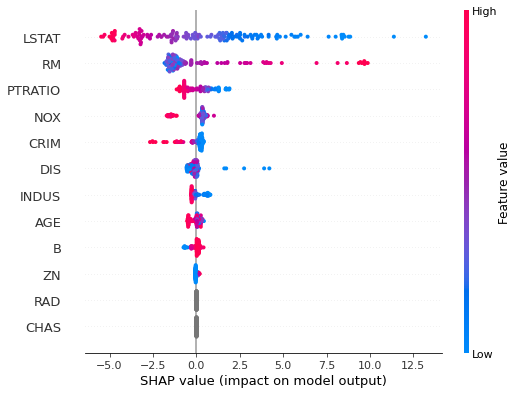

In [ ]:
shap.summary_plot(shap_values, X_test)